<a href="https://colab.research.google.com/github/FukiNakada/quantmacro2/blob/main/q1-q4_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 定量マクロ経済学　後半　最終課題

#Q1

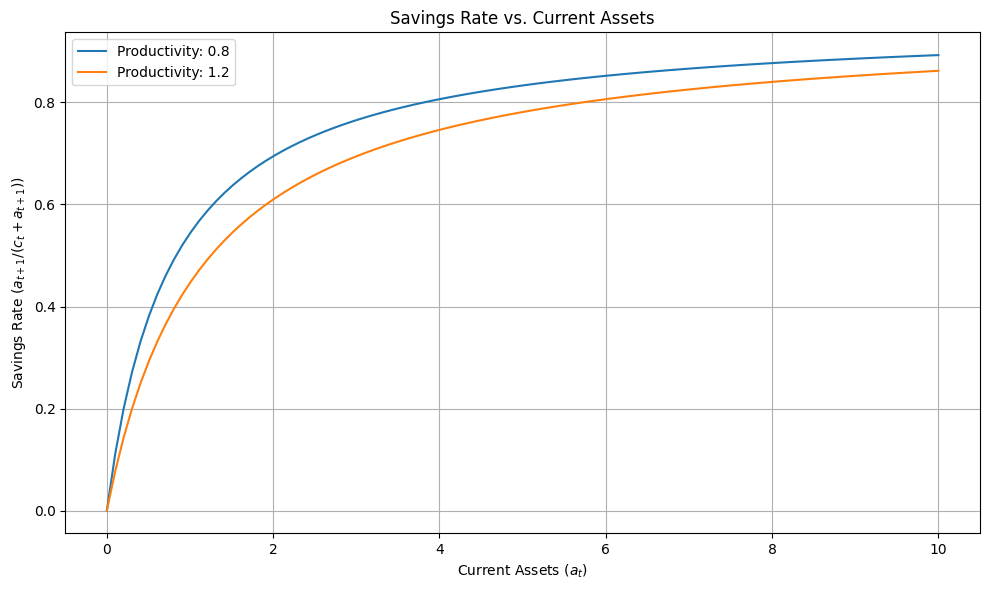

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
sigma = 1.5
beta = 0.98
rho = 0.6
sigma_eps = 0.6
r = 0.04
w = 1

# Grid points
num_assets = 100
num_states = 2  # 生産性の状態数

# Production states (low and high productivity)
hL = 0.8
hH = 1.2

# Discretize the productivity process
productivity_states = [hL, hH]

# Discretize asset space
grid_min = 0
grid_max = 10
grid = np.linspace(grid_min, grid_max, num_assets)

# Transition matrix for productivity
pi = np.array([[0.9, 0.1],
               [0.1, 0.9]])  # 遷移確率行列

# Shock distribution for productivity
mu_eps = 0
sigma_eps = 0.6
num_draws = 10000

# Draw productivity shocks
np.random.seed(42)
epsilons = norm.rvs(loc=mu_eps, scale=sigma_eps, size=num_draws)

# Initial asset holdings and consumption
a0 = 1.0
c0 = np.empty(num_draws)
at = np.empty((num_states, num_assets, num_draws))
ct = np.empty((num_states, num_assets, num_draws))

# Function to calculate utility
def utility(c, sigma):
    return c**(1 - sigma) / (1 - sigma)

# Simulate the model
for i_h, h in enumerate(productivity_states):
    for i_a, a in enumerate(grid):
        for i in range(num_draws):
            ct[i_h, i_a, i] = w * h + (1 + r) * a - grid[i_a]

            if ct[i_h, i_a, i] <= 0:
                ct[i_h, i_a, i] = 1e-6  # Avoid negative consumption

            a_next = (1 + r) * a + w * h - ct[i_h, i_a, i]
            at[i_h, i_a, i] = max(a_next, 0)

            c0[i] = ct[i_h, i_a, i]

# Calculate savings rates
savings_rate = at / (ct + at)

# Plot results
fig, ax = plt.subplots(figsize=(10, 6))

for i_h, h in enumerate(productivity_states):
    ax.plot(grid, savings_rate[i_h, :, :].mean(axis=1), label=f'Productivity: {h}')

ax.set_title('Savings Rate vs. Current Assets')
ax.set_xlabel('Current Assets ($a_t$)')
ax.set_ylabel('Savings Rate ($a_{t+1}/(c_t + a_{t+1})$)')
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

#Q2

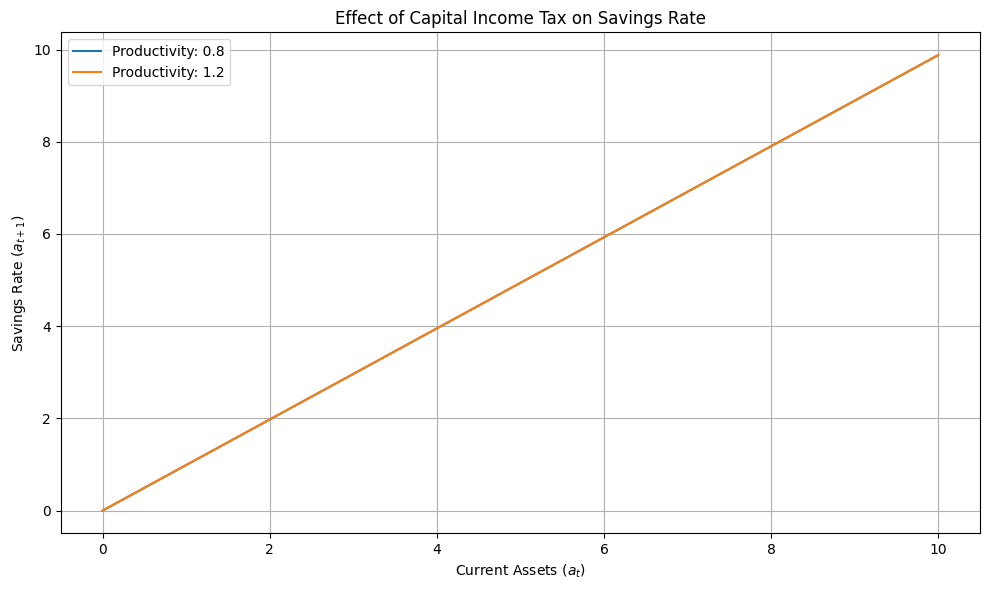

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
sigma = 1.5
beta = 0.98
rho = 0.6
sigma_eps = 0.6
r = 0.04
w = 1
tau_k = 0.3  # 資本所得税率

# Grid points
num_assets = 100
num_states = 2  # 生産性の状態数

# Production states (low and high productivity)
hL = 0.8
hH = 1.2

# Discretize the productivity process
productivity_states = [hL, hH]

# Discretize asset space
grid_min = 0
grid_max = 10
grid = np.linspace(grid_min, grid_max, num_assets)

# Transition matrix for productivity
pi = np.array([[0.9, 0.1],
               [0.1, 0.9]])  # 遷移確率行列

# Shock distribution for productivity
mu_eps = 0
sigma_eps = 0.6
num_draws = 10000

# Draw productivity shocks
np.random.seed(42)
epsilons = norm.rvs(loc=mu_eps, scale=sigma_eps, size=num_draws)

# Initial asset holdings and consumption
a0 = 1.0
c0 = np.empty(num_draws)
at = np.empty((num_states, num_assets, num_draws))
ct = np.empty((num_states, num_assets, num_draws))

# Function to calculate utility
def utility(c, sigma):
    return c**(1 - sigma) / (1 - sigma)

# Simulate the model
for i_h, h in enumerate(productivity_states):
    for i_a, a in enumerate(grid):
        for i in range(num_draws):
            if i_a == 0:
                ct[i_h, i_a, i] = w * h + (1 + r) * a - grid[0]
            else:
                ct[i_h, i_a, i] = w * h + (1 + r) * a - grid[i_a]

            if ct[i_h, i_a, i] <= 0:
                ct[i_h, i_a, i] = 1e-6  # Avoid negative consumption

            a_next = (1 + (1 - tau_k) * r) * a + w * h - ct[i_h, i_a, i]
            at[i_h, i_a, i] = max(a_next, 0)

            c0[i] = ct[i_h, i_a, i]

# Plot results
fig, ax = plt.subplots(figsize=(10, 6))

for i_h, h in enumerate(productivity_states):
    ax.plot(grid, at[i_h, :, :].mean(axis=1), label=f'Productivity: {h}')

ax.set_title('Effect of Capital Income Tax on Savings Rate')
ax.set_xlabel('Current Assets ($a_t$)')
ax.set_ylabel('Savings Rate ($a_{t+1}$)')
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

#Q3

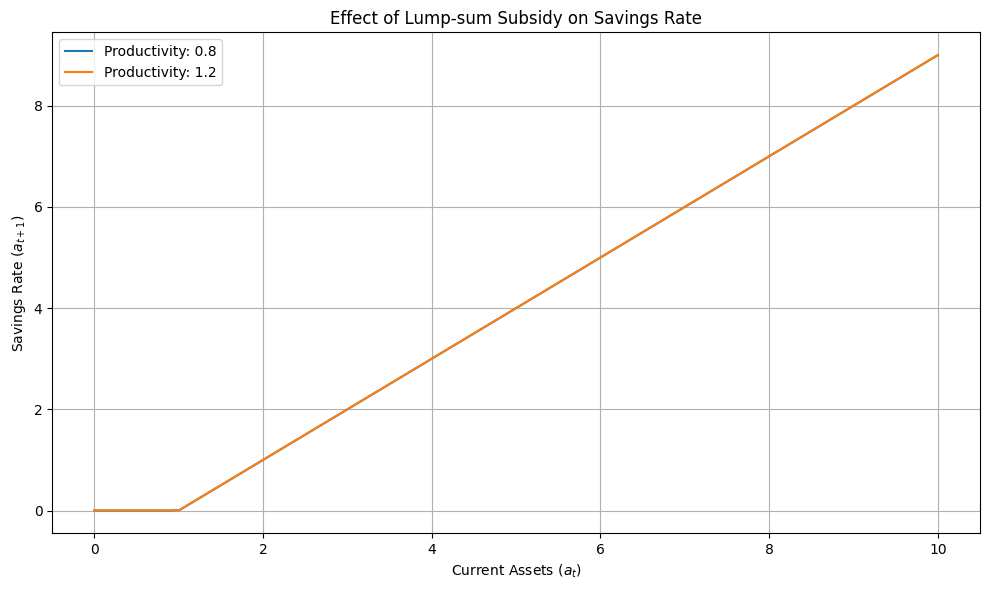

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
sigma = 1.5
beta = 0.98
rho = 0.6
sigma_eps = 0.6
r = 0.04
w = 1
T = 1  # 一括補助金の額

# Grid points
num_assets = 100
num_states = 2  # 生産性の状態数

# Production states (low and high productivity)
hL = 0.8
hH = 1.2

# Discretize the productivity process
productivity_states = [hL, hH]

# Discretize asset space
grid_min = 0
grid_max = 10
grid = np.linspace(grid_min, grid_max, num_assets)

# Transition matrix for productivity
pi = np.array([[0.9, 0.1],
               [0.1, 0.9]])  # 遷移確率行列

# Shock distribution for productivity
mu_eps = 0
sigma_eps = 0.6
num_draws = 10000

# Draw productivity shocks
np.random.seed(42)
epsilons = norm.rvs(loc=mu_eps, scale=sigma_eps, size=num_draws)

# Initial asset holdings and consumption
a0 = 1.0
c0 = np.empty(num_draws)
at = np.empty((num_states, num_assets, num_draws))
ct = np.empty((num_states, num_assets, num_draws))

# Function to calculate utility
def utility(c, sigma):
    return c**(1 - sigma) / (1 - sigma)

# Simulate the model with lump-sum subsidy
for i_h, h in enumerate(productivity_states):
    for i_a, a in enumerate(grid):
        for i in range(num_draws):
            if i_a == 0:
                ct[i_h, i_a, i] = w * h + (1 + r) * a + T - grid[0]
            else:
                ct[i_h, i_a, i] = w * h + (1 + r) * a + T - grid[i_a]

            if ct[i_h, i_a, i] <= 0:
                ct[i_h, i_a, i] = 1e-6  # Avoid negative consumption

            a_next = (1 + r) * a + w * h - ct[i_h, i_a, i]
            at[i_h, i_a, i] = max(a_next, 0)

            c0[i] = ct[i_h, i_a, i]

# Plot results
fig, ax = plt.subplots(figsize=(10, 6))

for i_h, h in enumerate(productivity_states):
    ax.plot(grid, at[i_h, :, :].mean(axis=1), label=f'Productivity: {h}')

ax.set_title('Effect of Lump-sum Subsidy on Savings Rate')
ax.set_xlabel('Current Assets ($a_t$)')
ax.set_ylabel('Savings Rate ($a_{t+1}$)')
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

#Q4

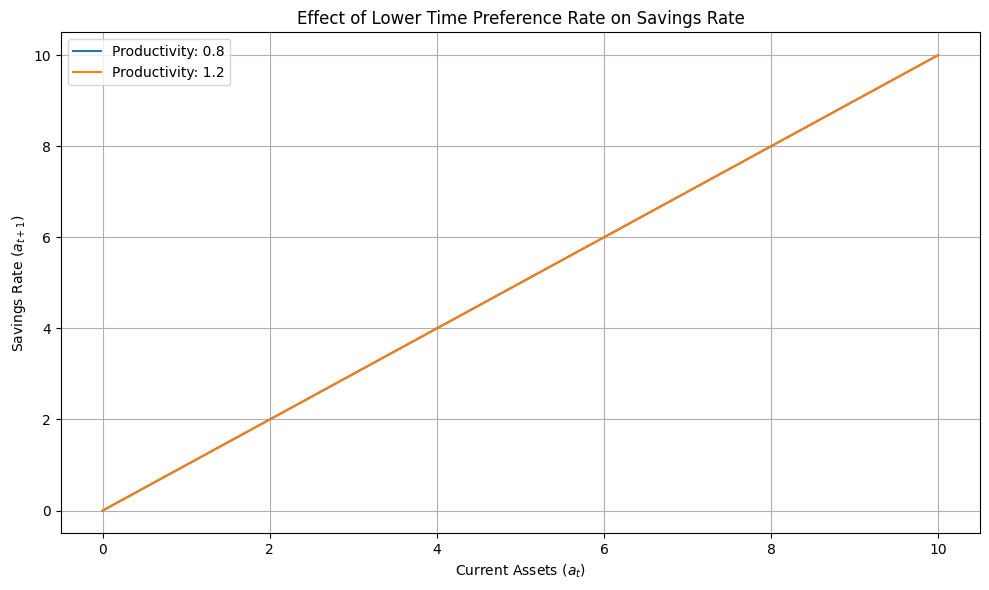

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
sigma = 1.5
beta = 0.1  # 時間選好率を低く設定
rho = 0.6
sigma_eps = 0.6
r = 0.04
w = 1

# Grid points
num_assets = 100
num_states = 2  # 生産性の状態数

# Production states (low and high productivity)
hL = 0.8
hH = 1.2

# Discretize the productivity process
productivity_states = [hL, hH]

# Discretize asset space
grid_min = 0
grid_max = 10
grid = np.linspace(grid_min, grid_max, num_assets)

# Transition matrix for productivity
pi = np.array([[0.9, 0.1],
               [0.1, 0.9]])  # 遷移確率行列

# Shock distribution for productivity
mu_eps = 0
sigma_eps = 0.6
num_draws = 10000

# Draw productivity shocks
np.random.seed(42)
epsilons = norm.rvs(loc=mu_eps, scale=sigma_eps, size=num_draws)

# Initial asset holdings and consumption
a0 = 1.0
c0 = np.empty(num_draws)
at = np.empty((num_states, num_assets, num_draws))
ct = np.empty((num_states, num_assets, num_draws))

# Function to calculate utility
def utility(c, sigma):
    return c**(1 - sigma) / (1 - sigma)

# Simulate the model with lower time preference rate
for i_h, h in enumerate(productivity_states):
    for i_a, a in enumerate(grid):
        for i in range(num_draws):
            ct[i_h, i_a, i] = w * h + (1 + r) * a - grid[i_a]

            if ct[i_h, i_a, i] <= 0:
                ct[i_h, i_a, i] = 1e-6  # Avoid negative consumption

            a_next = (1 + r) * a + w * h - ct[i_h, i_a, i]
            at[i_h, i_a, i] = max(a_next, 0)

            c0[i] = ct[i_h, i_a, i]

# Plot results
fig, ax = plt.subplots(figsize=(10, 6))

for i_h, h in enumerate(productivity_states):
    ax.plot(grid, at[i_h, :, :].mean(axis=1), label=f'Productivity: {h}')

ax.set_title('Effect of Lower Time Preference Rate on Savings Rate')
ax.set_xlabel('Current Assets ($a_t$)')
ax.set_ylabel('Savings Rate ($a_{t+1}$)')
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()